### Importing necessary libraries and the dataset

In [1]:

import numpy as np
from numpy import nan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, date, time
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

sns.set_style("darkgrid")

In [4]:
df = pd.read_csv("../CSV files/auto_dataset/toyota.csv")
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


In [5]:
df.shape

(6738, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [7]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [10]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [13]:
df.model.value_counts()

 Yaris            2122
 Aygo             1961
 Auris             712
 C-HR              479
 RAV4              473
 Corolla           267
 Prius             232
 Avensis           115
 Verso             114
 Hilux              86
 GT86               73
 Land Cruiser       51
 PROACE VERSO       15
 Supra              12
 Camry              11
 IQ                  8
 Urban Cruiser       4
 Verso-S             3
Name: model, dtype: int64

In [14]:
df.transmission.value_counts()

Manual       3826
Automatic    2657
Semi-Auto     254
Other           1
Name: transmission, dtype: int64

In [15]:
df.fuelType.value_counts()

Petrol    4087
Hybrid    2043
Diesel     503
Other      105
Name: fuelType, dtype: int64

In [50]:
df.year.value_counts().index

Int64Index([2017, 2019, 2018, 2016, 2015, 2014, 2013, 2020, 2012, 2011, 2009,
            2007, 2008, 2010, 2005, 2006, 2004, 2003, 2002, 1998, 2001, 1999,
            2000],
           dtype='int64')

In [20]:
df_exp = df.loc[df["year"] < 2015]
df_exp

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10,GT86,2013,10495,Manual,72000,Petrol,265,36.2,2.0
17,GT86,2014,12998,Manual,25499,Petrol,260,36.2,2.0
34,GT86,2013,11575,Manual,50584,Petrol,265,36.2,2.0
36,GT86,2014,14999,Manual,18389,Petrol,260,36.2,2.0
52,GT86,2014,13495,Manual,24667,Petrol,265,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


### Data visualization

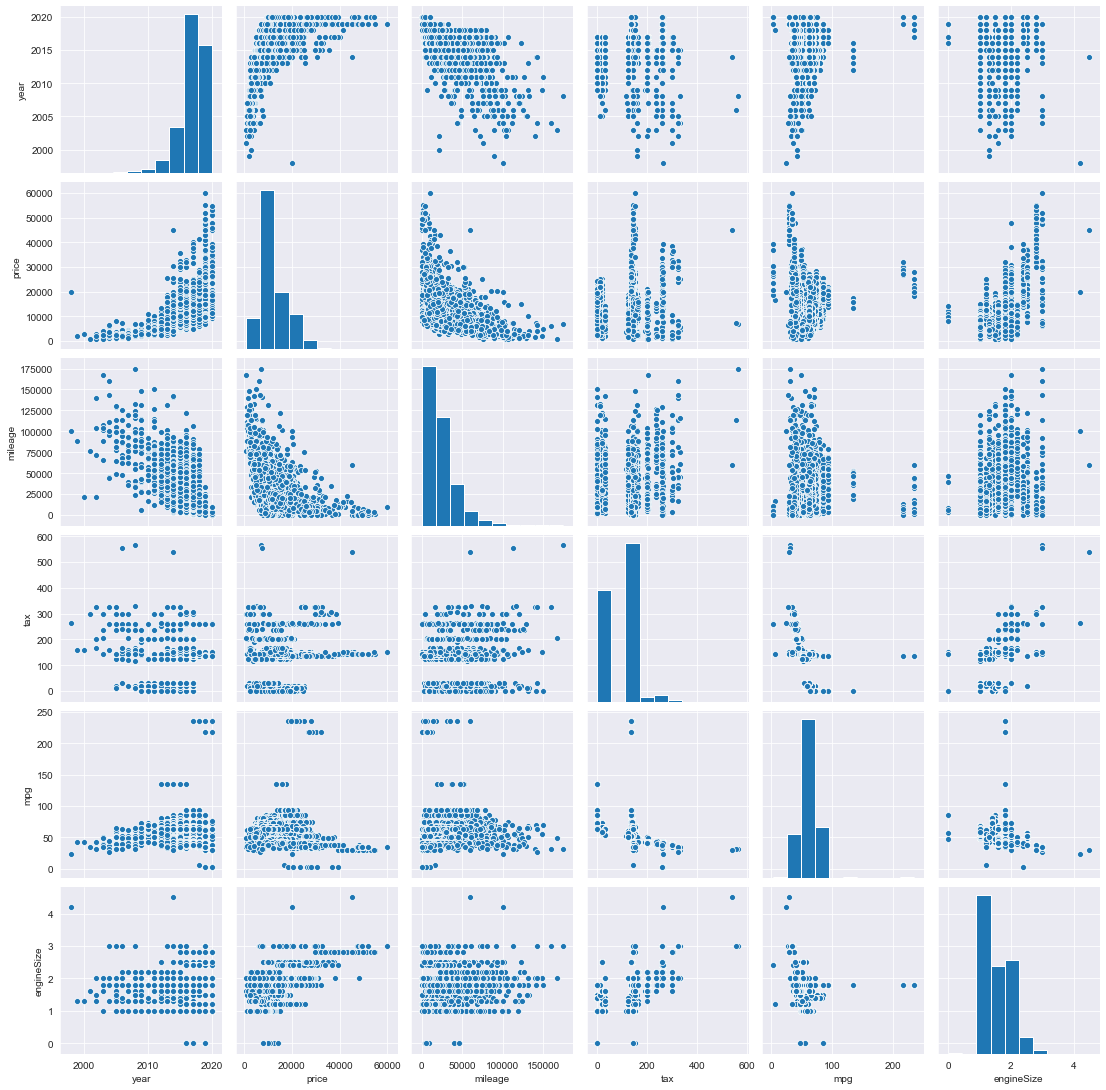

In [22]:
sns.pairplot(df)

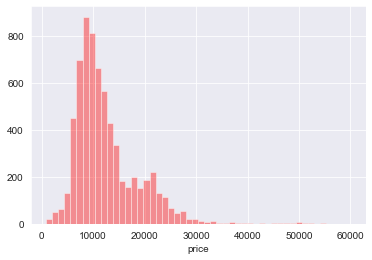

In [24]:
sns.distplot(df.price, color = "r", kde = False)

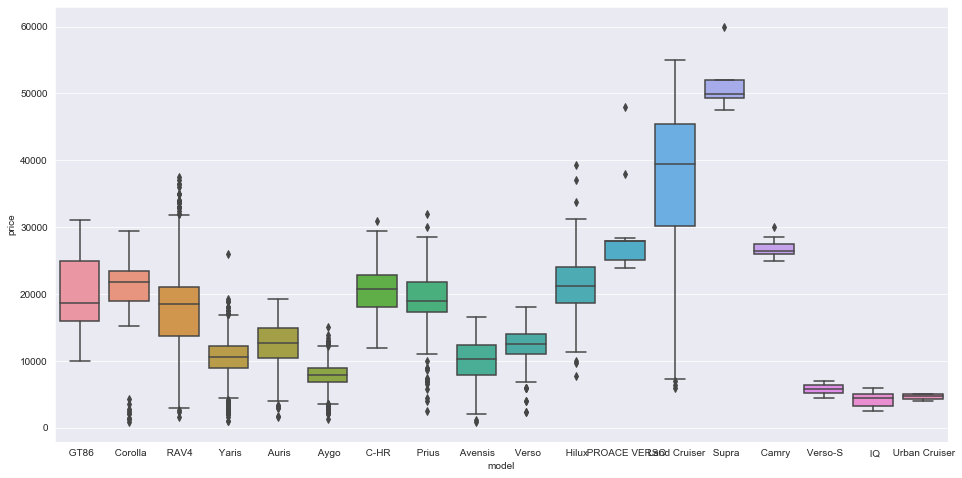

In [25]:
plt.figure(figsize = (16, 8))
sns.boxplot(x = "model", y = "price", data = df)

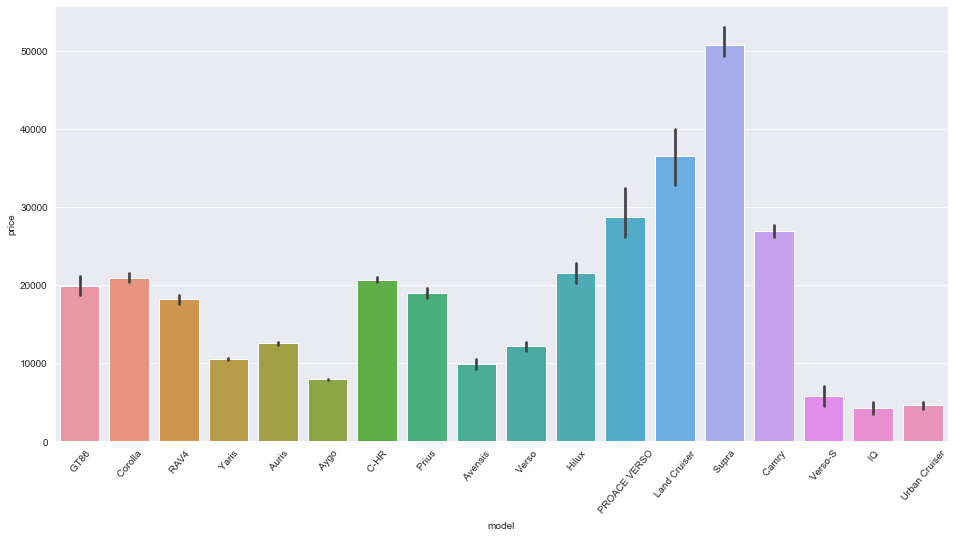

In [30]:
plt.figure(figsize = (16, 8))
model = sns.barplot(x = "model", y = "price", data = df)
model.set_xticklabels(model.get_xticklabels(), rotation=50);

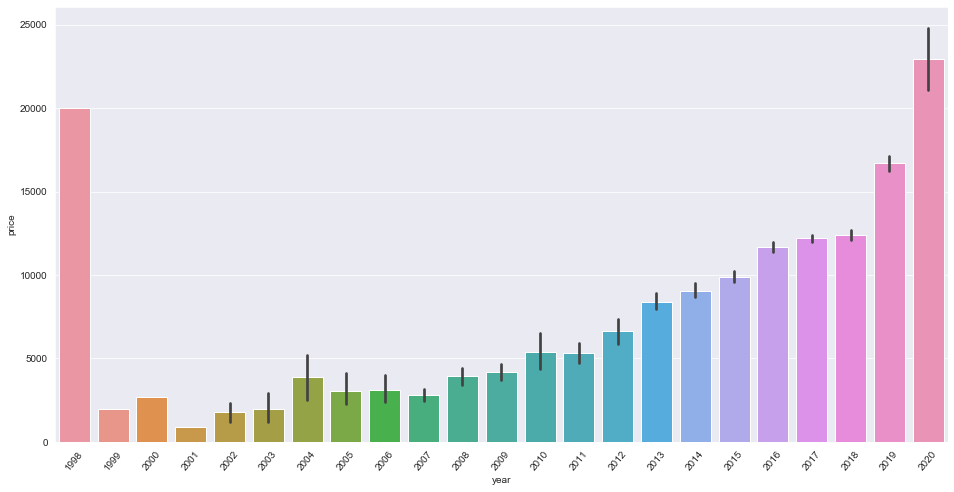

In [32]:
plt.figure(figsize = (16, 8))
pr_yr = sns.barplot(x = "year", y = "price", data = df)
pr_yr.set_xticklabels(pr_yr.get_xticklabels(), rotation=50);

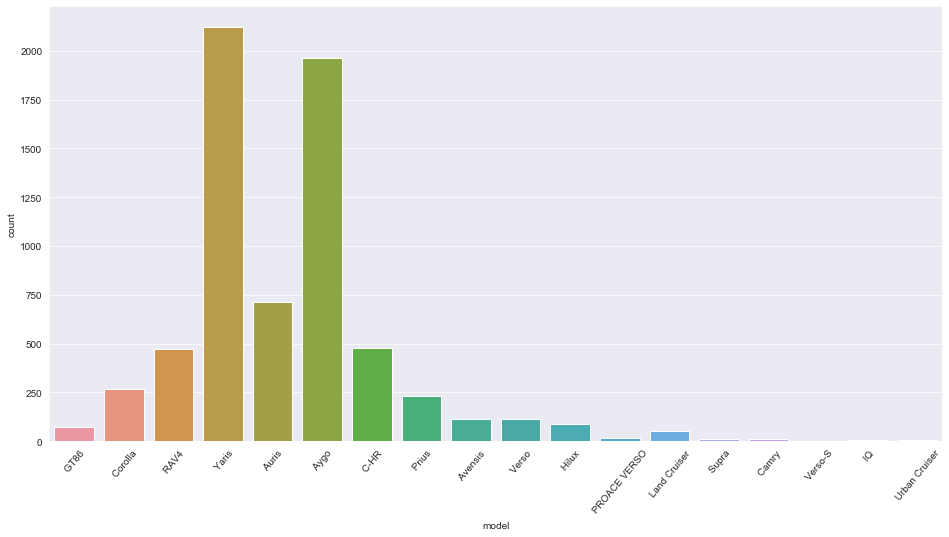

In [38]:
plt.figure(figsize = (16, 8))
mod_count = sns.countplot(df["model"])
mod_count.set_xticklabels(mod_count.get_xticklabels(), rotation=50);

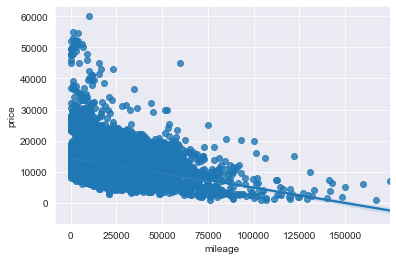

In [33]:
sns.regplot(x = "mileage", y = "price", data = df)

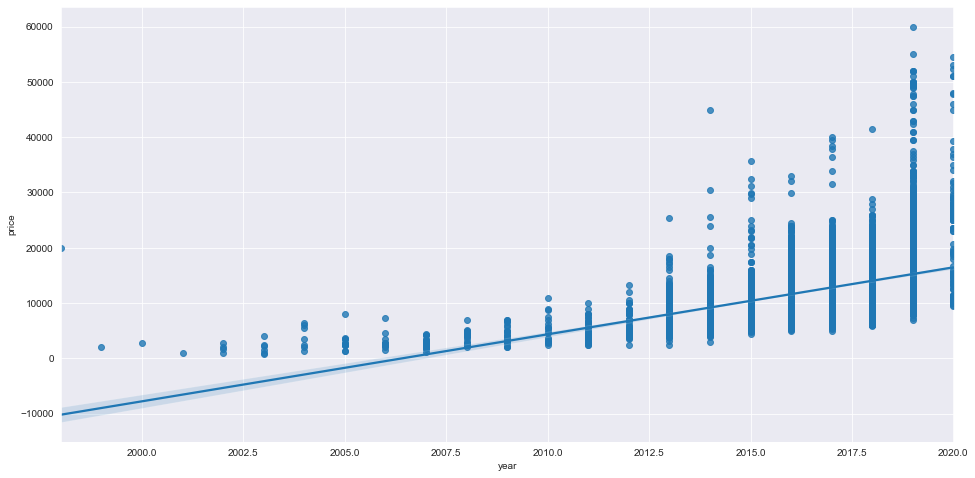

In [44]:
plt.figure(figsize = (16, 8))
sns.regplot(x = "year", y = "price", data = df)

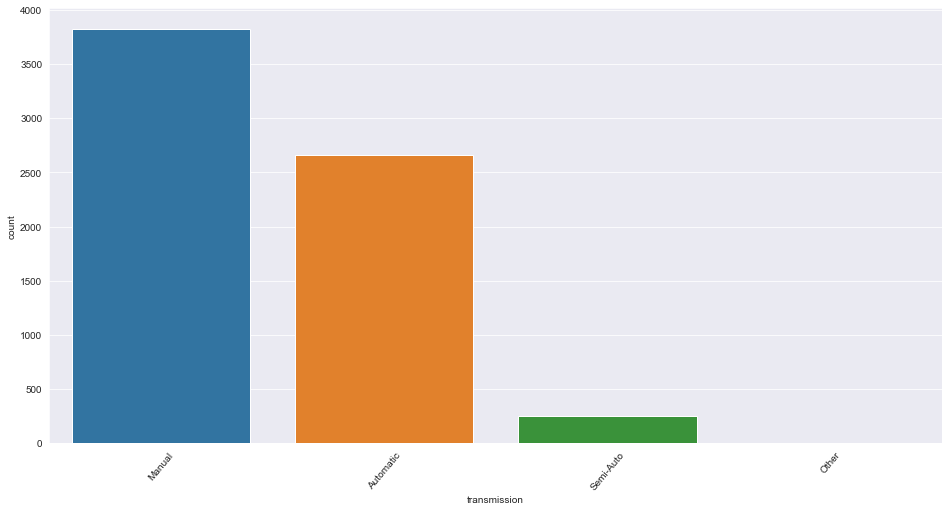

In [53]:
plt.figure(figsize = (16, 8))
trm_count = sns.countplot(df["transmission"])
trm_count.set_xticklabels(trm_count.get_xticklabels(), rotation=50);

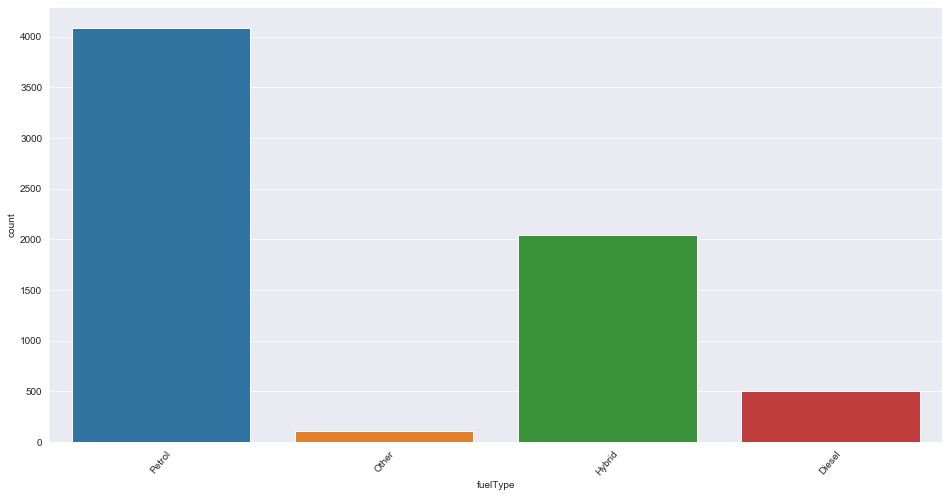

In [54]:
plt.figure(figsize = (16, 8))
fuel_count = sns.countplot(df["fuelType"])
fuel_count.set_xticklabels(fuel_count.get_xticklabels(), rotation=50);

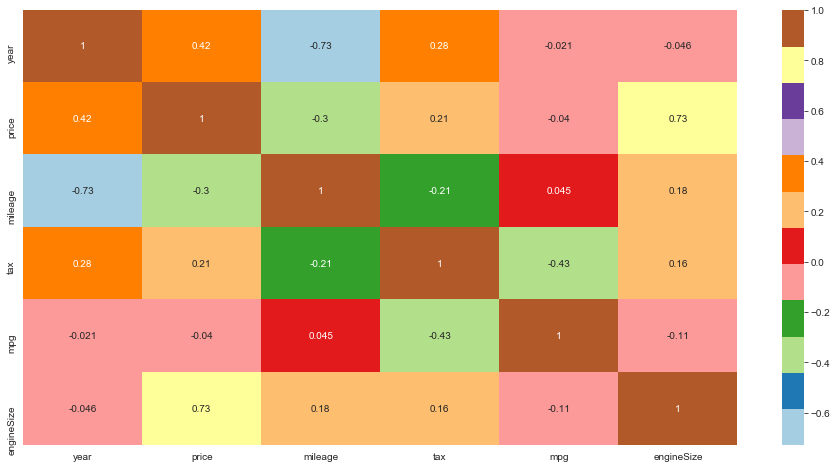

In [55]:
plt.figure(figsize = (16, 8))
sns.heatmap(df.corr(),annot = True, cmap = "Paired")

### Preprocessing

In [59]:
df = pd.get_dummies(data=df, columns=["model", "transmission", "fuelType"])

In [61]:
X = df.drop("price", axis = "columns")
y = df.price

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 23)

### Building the models
#### Model 1 (Linear Regression)

In [65]:
L = LinearRegression()

In [66]:
L.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
l_pred = L.predict(X_test)
print(L.score(X_test, y_test))
price_mae = mean_absolute_error(y_test, l_pred)
print(price_mae)

0.9162353884882636
1079.5193679182862


#### Model 2 (Ridge)

In [68]:
from sklearn.linear_model import Ridge

In [69]:
R = Ridge(alpha=1.0)
R.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [83]:
r_pred = R.predict(X_test)
price_mae = mean_absolute_error(y_test, r_pred)
print(R.score(X_test, y_test))
print(price_mae)

0.9159788040929989
1087.3540237152333


#### Model 3 (Decision Tree)

In [89]:
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds_val)
    return(mae)

In [105]:
for max_leaf_nodes in[5,500, 550, 600]:
    best_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, best_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  2490
Max leaf nodes: 500  		 Mean Absolute Error:  905
Max leaf nodes: 550  		 Mean Absolute Error:  896
Max leaf nodes: 600  		 Mean Absolute Error:  901


In [106]:
Dt = DecisionTreeRegressor(max_leaf_nodes=550, random_state=0)

In [108]:
Dt.fit(X_train, y_train)
Dt_pred = Dt.predict(X_test)

In [109]:
price_mae = mean_absolute_error(y_test, Dt_pred)
print(Dt.score(X_test, y_test))
print(price_mae)

0.9404543695378529
896.2239651492895


#### Model 4 (Random Forest)

In [95]:
def get_rse(max_leaf_nodes, X_train, X_test, y_train, y_test, y_pred):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rse = np.sqrt(mse)
    return(rse)

In [99]:
for max_leaf_nodes in[50, 100, 200, 300, 500, 6000]:
    best_rse = get_rse(max_leaf_nodes, X_train, X_test, y_train, y_test, y)
    print("Max leaf nodes: %d  \t\t Root Square Error:  %d" %(max_leaf_nodes, best_rse))

Max leaf nodes: 50  		 Root Square Error:  1401
Max leaf nodes: 100  		 Root Square Error:  1305
Max leaf nodes: 200  		 Root Square Error:  1266
Max leaf nodes: 300  		 Root Square Error:  1265
Max leaf nodes: 500  		 Root Square Error:  1279
Max leaf nodes: 6000  		 Root Square Error:  1308


In [101]:
Rf = RandomForestRegressor(max_leaf_nodes = 300, n_estimators = 10, random_state = 0)

In [103]:
Rf.fit(X_train, y_train)
Rf_predict = Rf.predict(X_test)

In [104]:
print(Rf.score(X_test, y_test))

0.9550213651680253
